In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

# Predicting Market Value Using Linear Regression 

In [2]:
## Download the dataset GlenCove

In [3]:
## Upload the dataset using pandas

In [4]:
glen_file = 'C:\\Users\\Joey\\Documents\\GlenCove.xlsx'
GlenCove = pd.read_excel(glen_file)

In [5]:
## View the first 10 rows of the data using the head method

In [6]:
print(GlenCove.head(n=10))

                 Address  Fair Market Value($000)  Property Size (acres)  Age  \
0        9 Sycamore Road                    522.9                 0.2297   56   
1        21 Jefferson St                    425.0                 0.2192   61   
2  38 Hitching Post Lane                    539.2                 0.1630   39   
3           4 Poppy Lane                    628.2                 0.4608   28   
4         5 Daniel Drive                    490.4                 0.2549   56   
5     15 Francis Terrace                    487.7                 0.2290   98   
6      23 Guilfoy Street                    370.3                 0.1808   58   
7       17 Carlyle Drive                    777.9                 0.5015   17   
8         8 Craft Avenue                    347.1                 0.2229   62   
9       22 Beechwood Ct.                    756.8                 0.1300   25   

   House Size (square feet)  Rooms  Baths  Garage  
0                      2448      7    3.5       2  
1   

In [7]:
## Rename the columns

In [8]:
GlenCove = GlenCove.rename(columns={'Fair Market Value($000)':'fair_market_value', 'Property Size (acres)':'property_size', 'House Size (square feet)':'house_size'})

In [9]:
## Recode garage values as binary and remove the age column

In [10]:
garage_dummies = pd.get_dummies(GlenCove['Garage']).iloc[:, 1:]
garage_dummies = garage_dummies[1] + garage_dummies[2]
GlenCove_final = GlenCove.drop('Age', 1)
GlenCove_final['Garage'] = garage_dummies
GlenCove_final.head(n=10)

,Address,fair_market_value,property_size,house_size,Rooms,Baths,Garage
0,9 Sycamore Road,522.9,0.2297,2448,7,3.5,1
1,21 Jefferson St,425.0,0.2192,1942,7,2.5,1
2,38 Hitching Post Lane,539.2,0.1630,2073,5,3.0,1
3,4 Poppy Lane,628.2,0.4608,2707,8,2.5,1
4,5 Daniel Drive,490.4,0.2549,2042,7,1.5,1
5,15 Francis Terrace,487.7,0.2290,2089,7,2.0,0
6,23 Guilfoy Street,370.3,0.1808,1433,7,2.0,0
7,17 Carlyle Drive,777.9,0.5015,2991,9,2.5,1
8,8 Craft Avenue,347.1,0.2229,1008,5,1.0,0
9,22 Beechwood Ct.,756.8,0.1300,3202,8,2.5,1


In [11]:
## Print the summary statistics for all the numerical columns

In [12]:
GlenCove_numeric = GlenCove_final[['fair_market_value', 'property_size', 'house_size', 'Rooms', 'Baths']]
GlenCove_sum = GlenCove_numeric.describe()
print(GlenCove_sum)

       fair_market_value  property_size   house_size      Rooms      Baths
count          30.000000      30.000000    30.000000  30.000000  30.000000
mean          474.910000       0.275960  1978.833333   6.833333   2.000000
std           144.312669       0.236445   550.875234   1.487496   0.694808
min           310.200000       0.085200  1008.000000   5.000000   1.000000
25%           374.675000       0.152650  1622.250000   6.000000   1.625000
50%           431.200000       0.204050  1992.000000   7.000000   2.000000
75%           535.125000       0.270350  2205.500000   7.750000   2.500000
max           889.000000       1.310000  3202.000000  11.000000   3.500000


In [13]:
### Print the correlation matrix for property_size, house_size, Rooms, and Baths

In [14]:
print(GlenCove_final[['property_size','house_size','Rooms','Baths']].corr())

               property_size  house_size     Rooms     Baths
property_size       1.000000    0.211664  0.052963  0.053408
house_size          0.211664    1.000000  0.399573  0.521314
Rooms               0.052963    0.399573  1.000000  0.133457
Baths               0.053408    0.521314  0.133457  1.000000


In [15]:
## Type out the direction and strength of the correlation between
## each pair of variables in your matrix 

In [16]:
## Property Size: 
## weak positive correlations with house_size, Rooms, and Baths

## House Size: 
## weak positive correlations with property_size and Rooms, 
## moderate positive correlation with Baths

## Rooms:
## weak positive correlations with property_size, house_size, and Baths

## Baths:
## weak positive correlations with property_size and Rooms,
## moderate positive correlation with house_size

In [17]:
## Using the statsmodels library, fit the data to a linear regression model

In [18]:
results = smf.ols('fair_market_value ~ property_size + house_size + Rooms + Baths + Garage', data = GlenCove_final).fit()

In [19]:
## Print the regression results summary

In [20]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      fair_market_value   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     21.09
Date:                Tue, 18 May 2021   Prob (F-statistic):           4.52e-08
Time:                        01:46:51   Log-Likelihood:                -165.94
No. Observations:                  30   AIC:                             343.9
Df Residuals:                      24   BIC:                             352.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        78.0523     67.779      1.152

In [21]:
## Create and print an ANOVA table

In [22]:
aov_table = sm.stats.anova_lm(results, typ=2)
print(aov_table)

                      sum_sq    df          F    PR(>F)
property_size  185956.980096   1.0  39.850226  0.000002
house_size      45335.829171   1.0   9.715382  0.004693
Rooms              27.229339   1.0   0.005835  0.939743
Baths           13203.326340   1.0   2.829448  0.105518
Garage           3736.437085   1.0   0.800711  0.379768
Residual       111993.529961  24.0        NaN       NaN


In [23]:
## Explain whether or not you think this is a good model and why. 
## You must use at least 2 measurements from your model to explain.

In [24]:
## I believe this is a decent model. According to the R-squared value, the model accounts for about 82% of 
## the variability in fair_market_value, and the p-value for the F-statistic is close to 0, indicating that 
##the results are likely significant. However, when looking through the p-values for each independent 
## variable,it seems that only two (property_size and house_size) are significant, and it may be worthwile 
## to consider removing these insignificant variables. (this is all assuming a significance level of 0.05)

In [25]:
## Type out the regression equation with the coefficients from the model output

In [26]:
## Y = 78.0523 + (359.3104)property_size + (0.1025)house_size + (0.7385)Rooms + (36.8445)Baths 
## + (28.3802)Garage

In [27]:
## Predict the fair market value of a house that is 2000 sqft, on 0.30 acres, with 6 rooms, 2 bathrooms, and 
## a garage

In [28]:
prediction =  results.predict(exog=dict(house_size = 2000, property_size = 0.30, Rooms = 6, Baths = 2, Garage = 1))
prediction_string = prediction.to_string()
print(prediction_string[:11], "Thousand Dollars")

0    497.40 Thousand Dollars


# Plotting the Distribution of NBA Franchise Values

In [29]:
## Download the dataset NBAValues.xlsx

In [30]:
## Upload the dataset into your jupyter notebook using pandas

In [31]:
nba_file = 'C:\\Users\\Joey\\Documents\\NBAValues.xlsx'
nba = pd.read_excel(nba_file)

In [32]:
## Display the entire dataframe without using the print function

In [33]:
nba

,Team Name,Team Code,Revenue ($mil),Current Value ($mil)
0,Atlanta Hawks,ATL,133,825
1,Boston Celtics,BOS,173,1700
2,Brooklyn Nets,BKN,212,1500
3,Charlotte Bobcats,CHA,130,725
4,Chicago Bulls,CHI,201,2000
5,Cleveland Cavaliers,CLE,149,915
6,Dallas Mavericks,DAL,168,1150
7,Denver Nuggets,DEN,136,855
8,Detroit Pistons,DET,144,810
9,Golden State Warriors,GSW,168,1300


In [34]:
## Create at least 3 histograms of the Current Value column and change the number of bins and the color 
## for each graph. 

In [35]:
## Each histogram should have an x-axis label, y-axis label, and title. The axis labels should have size 
## 10 font and the title should be size 16.

([<matplotlib.axis.XTick at 0x29072233fa0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

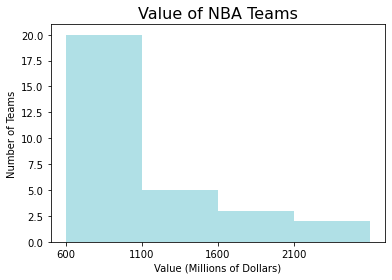

In [36]:
fig, ax = plt.subplots()
plt.hist(nba['Current Value ($mil) '], bins = 4, color = 'powderblue')
plt.title('Value of NBA Teams', fontsize = 16)
ax.set_xlabel('Value (Millions of Dollars)', fontsize = 10)
ax.set_ylabel('Number of Teams', fontsize = 10)
plt.xticks(np.arange(600, 2550, 500)) 

([<matplotlib.axis.XTick at 0x29072305d60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

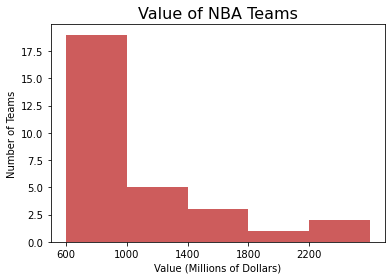

In [37]:
fig, ax = plt.subplots()
plt.hist(nba['Current Value ($mil) '], bins = 5, color = 'indianred')
plt.title('Value of NBA Teams', fontsize = 16)
ax.set_xlabel('Value (Millions of Dollars)', fontsize = 10)
ax.set_ylabel('Number of Teams', fontsize = 10)
plt.xticks(np.arange(600, 2600, 400)) 

([<matplotlib.axis.XTick at 0x2907236d4c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

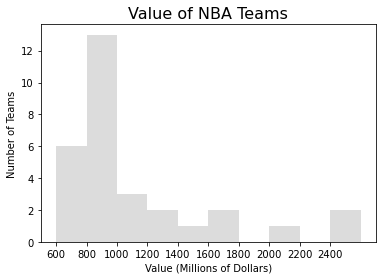

In [38]:
fig, ax = plt.subplots()
plt.hist(nba['Current Value ($mil) '], bins = 10, color = 'gainsboro')
plt.title('Value of NBA Teams', fontsize = 16)
ax.set_xlabel('Value (Millions of Dollars)', fontsize = 10)
ax.set_ylabel('Number of Teams', fontsize = 10)
plt.xticks(np.arange(600, 2600, 200)) 

In [39]:
## Specify what you think is the best number of bins for this dataset

In [40]:
## The best number of bins is 5 as it limits the number of white space while also providing a smooth 
## and detailed distribution curve.

In [41]:
## Describe the shape of the distribution (e.g. normal, bimodal, right-skewed, left-skewed, etc.)

In [42]:
## This is a right-skewed distribution as the right side (tail) is longer than the left side.

# Plotting the Distribution of MLB Franchise Values

In [43]:
## Download the dataset baseball_values.csv

In [44]:
## Upload the dataset using pandas

In [45]:
mlb_file = 'C:\\Users\\Joey\\Documents\\baseball_values.csv'
mlb = pd.read_csv(mlb_file)

In [46]:
## Create a boxplot of the value column. Include an x-axis label, title, and change the color
print(mlb)

                   Team  Revenue  Value
0             Baltimore      245   1000
1                Boston      370   2100
2     Chicago White Sox      227    975
3             Cleveland      207    825
4               Detroit      254   1125
5               Houston      175    800
6           Kansas City      231    700
7    Los Angeles Angels      304   1300
8             Minnesota      223    895
9      New York Yankees      508   3200
10              Oakland      202    725
11              Seattle      250   1100
12            Tampa Bay      188    625
13                Texas      266   1220
14              Toronto      226    870
15              Arizona      211    840
16              Atlanta      267   1150
17         Chicago Cubs      302   1800
18           Cincinnati      227    885
19             Colorado      214    855
20  Los Angeles Dodgers      403   2400
21                Miami      188    650
22            Milwaukee      226    875
23        New York Mets      263   1350


Text(0.5, 0, 'Value (Millions of Dollars)')

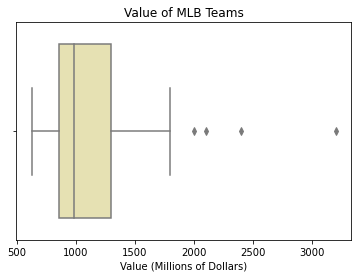

In [47]:
mlb_plot = sns.boxplot(x = 'Value', data = mlb, color = 'palegoldenrod')
mlb_plot.set_title('Value of MLB Teams')
mlb_plot.set_xlabel('Value (Millions of Dollars)')

In [48]:
## Change the orientation of the boxplot so it is displayed vertically instead of horizontally. 
## (seaborn has since changed syntax for vertical boxplots, need to check documentation to fix)

C:\Users\Joey\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 0, 'Value (Millions of Dollars)')

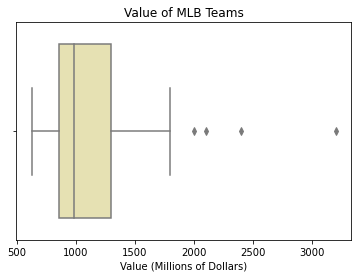

In [49]:
mlb_plot = sns.boxplot(x = 'Value', data = mlb, color = 'palegoldenrod', orient = 'v')
mlb_plot.set_title('Value of MLB Teams')
mlb_plot.set_xlabel('Value (Millions of Dollars)')

In [50]:
## Adjust an optional argument so that the whiskers extend 3X the IQR

Text(0.5, 0, 'Value (Millions of Dollars)')

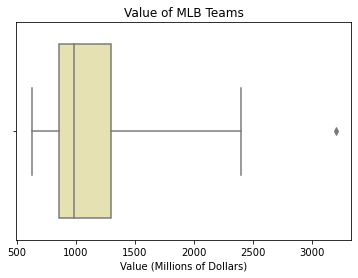

In [51]:
mlb_plot = sns.boxplot(x = 'Value', data = mlb, color = 'palegoldenrod', whis = 3)
mlb_plot.set_title('Value of MLB Teams')
mlb_plot.set_xlabel('Value (Millions of Dollars)')

In [52]:
## Label the outlier with the team name displayed in red above the point

Text(3245, -0.02, 'The New York Yankees')

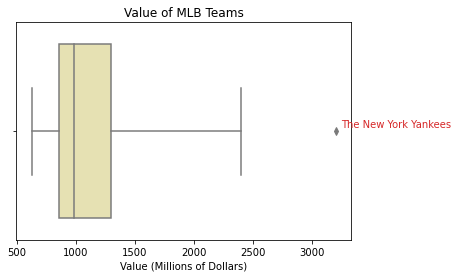

In [53]:
mlb_plot = sns.boxplot(x = 'Value', data = mlb, color = 'palegoldenrod', whis = 3)
mlb_plot.set_title('Value of MLB Teams')
mlb_plot.set_xlabel('Value (Millions of Dollars)')
mlb_plot.text(x = 3245, y = -.02, s = 'The New York Yankees', color = 'tab:red')

In [54]:
## Create a violin plot of the value column. Include a title and x-axis label.

Text(0.5, 0, 'Value (Millions of Dollars)')

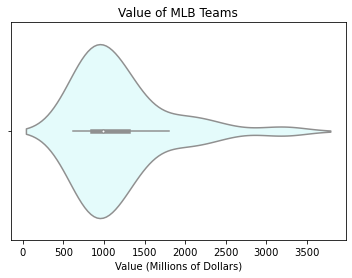

In [55]:
mlb_violin = sns.violinplot(x = 'Value', data = mlb, color = 'lightcyan')
mlb_violin.set_title('Value of MLB Teams')
mlb_violin.set_xlabel('Value (Millions of Dollars)')

In [56]:
## Type the approximate mode of the dataset

In [57]:
## The approximate mode is 990

# Using k-NN to Classify Types of Fruit

In [58]:
## Download the dataset fruit.tsv

In [59]:
## Upload the dataset using a pandas function that can read in tabular 
## separated values

In [60]:
fruit_file = 'C:\\Users\\Joey\\Documents\\fruit.tsv'
fruit = pd.read_table(fruit_file)

In [61]:
## Display the first 5 rows of the data 

In [62]:
fruit.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [63]:
## Determine how many observations of each fruit are contained in the dataset

In [64]:
num_apple = (fruit.fruit_label == 1).sum()
num_mandarin = (fruit.fruit_label == 2).sum()
num_orange = (fruit.fruit_label == 3).sum()
num_lemon = (fruit.fruit_label == 4).sum()

In [65]:
print(num_apple, 'apples,', num_mandarin, 'mandarins,', num_orange, 'oranges,', num_lemon, 'lemons')

19 apples, 5 mandarins, 19 oranges, 16 lemons


In [66]:
## Subset the dataframe and create a new dataframe with just the columns 'fruit_name', 'mass','width', 
## 'height', and 'color_score' 

In [67]:
fruit_final = fruit[['fruit_name', 'mass', 'width', 'height', 'color_score']]

In [68]:
fruit_final.head()

,fruit_name,mass,width,height,color_score
0,apple,192,8.4,7.3,0.55
1,apple,180,8.0,6.8,0.59
2,apple,176,7.4,7.2,0.60
3,mandarin,86,6.2,4.7,0.80
4,mandarin,84,6.0,4.6,0.79


In [69]:
## Create a scatterplot matrix using the new dataframe and color the dots based on fruit name. 
## (Be sure to include title and legend)

Text(0.5, 1.05, 'Scatterplot Matrix: Fruit Name')

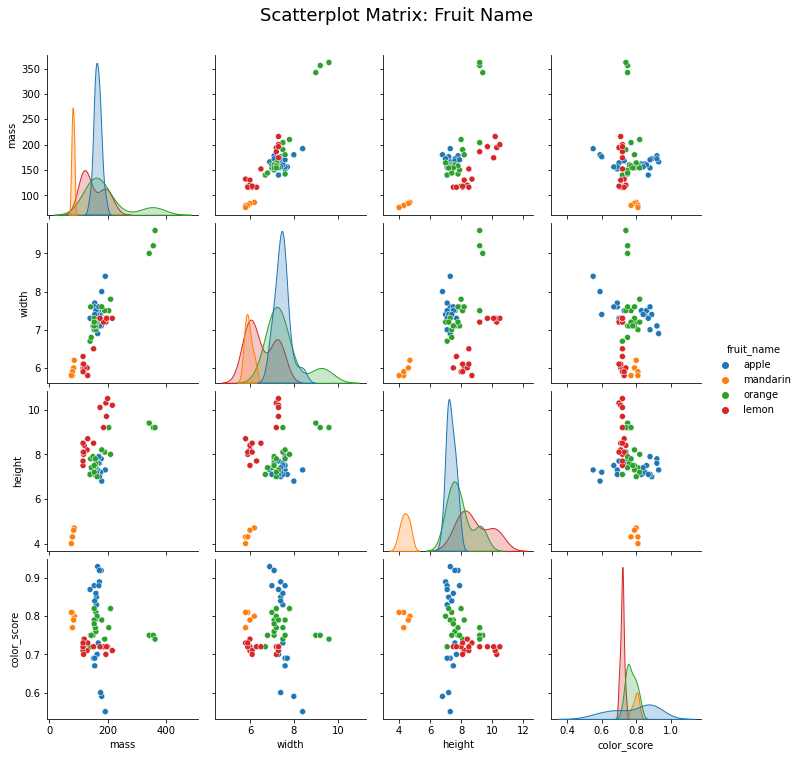

In [70]:
fruit_matrix = sns.pairplot(fruit_final, hue = 'fruit_name')
fruit_matrix.fig.suptitle("Scatterplot Matrix: Fruit Name", y = 1.05, fontsize = 18)

In [71]:
## From the scatterplot matrix determine whether or not you think mass and height would be could predictor 
## variables for the fruit name and leave your answer in a brief comment or markdown cell

In [72]:
## I do not think that mass and height would be good predictor variables, as it seems as though there is a lot 
## of overlap in the different types of fruit near the middle of the distribution. 

In [73]:
## Assign fruit_name as your dependent variable and the rest of the variables in your new dataframe as your 
## independent variable

In [74]:
x = fruit_final.iloc[:, 1:4].values
y = fruit_final.iloc[:, 0].values

In [75]:
## Split the data into training and test splits (70% for training and 30% for testing). Set the random state 
## to 0. 

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [77]:
## Print out the summary statistics for the independent variables in your training set

In [78]:
print(pd.DataFrame(x_train).describe())

                0          1          2
count   41.000000  41.000000  41.000000
mean   160.878049   7.058537   7.682927
std     53.607926   0.842608   1.236710
min     80.000000   5.800000   4.300000
25%    130.000000   6.200000   7.300000
50%    158.000000   7.200000   7.600000
75%    172.000000   7.500000   8.200000
max    356.000000   9.200000  10.500000


In [79]:
## Print out the summary statistics for the independent variables in your test set

In [80]:
print(pd.DataFrame(x_test).describe())

                0          1          2
count   18.000000  18.000000  18.000000
mean   168.222222   7.211111   7.716667
std     59.380682   0.767646   1.649331
min     76.000000   5.800000   4.000000
25%    144.000000   7.100000   7.200000
50%    162.000000   7.200000   7.550000
75%    179.000000   7.375000   8.175000
max    362.000000   9.600000  10.300000


In [81]:
## Create a K-NN classifier model with 5NN 
classifier = KNeighborsClassifier(n_neighbors=5, )

In [82]:
## Standardize data (if necessary)
## scaler = StandardScaler()  
## scaler.fit(x_train)
## x_train = scaler.transform(x_train)  
## x_test = scaler.transform(x_test) 

In [83]:
## Initialize the classifier
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [84]:
## Use your test set to make predictions

In [85]:
y_pred = classifier.predict(x_test)
y_pred

array(['orange', 'apple', 'lemon', 'lemon', 'apple', 'apple', 'lemon',
       'lemon', 'apple', 'lemon', 'mandarin', 'apple', 'orange', 'apple',
       'lemon', 'apple', 'apple', 'mandarin'], dtype=object)

In [86]:
## Print confusion matrix

In [87]:
conf = metrics.confusion_matrix(y_test, y_pred)
print(conf)

[[3 1 0 0]
 [1 2 0 0]
 [0 0 2 0]
 [4 3 0 2]]


In [88]:
## Print the model accuracy rate

In [89]:
metrics.accuracy_score(y_test, y_pred)

0.5